<a href="https://colab.research.google.com/github/suyog568/myfiles/blob/main/ClassificationTask_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.1 For Classifcation Task [25]:
1. Exploratory Data Analysis and Data Understanding [5]:
1. Choosing a Dataset:
• Select a dataset of your choice that interests you and aligns with one of the United Nations
Sustainable Development Goals (UNSDG).
• Load the dataset into a DataFrame object using the Pandas library.
• Perform an initial analysis to gather a detailed description of the dataset. For example:
(a) When and by whom was the dataset created?
(b) How did you access the dataset?
(c) How does it align with the chosen UNSDG?
(d) List all the attributes (columns) present in the dataset.
• Identify potential questions that the dataset could help answer.
• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).

**Load Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [ ]:
file_path = "/content/drive/MyDrive/Data Set /framingham.csv"
df = pd.read_csv(file_path)


**a) When and by whom was the dataset created?**

The Framingham Heart Study began in 1948 and was conducted by the National Heart, Lung, and Blood Institute (NHLBI) in collaboration with Boston University.

**(b) How did you access the dataset?**

The dataset was accessed from publicly available sources such as Kaggle.

**(c) How does it align with the chosen UNSDG?**

The dataset aims to predict cardiovascular disease (CVD), helping in early intervention and healthcare improvements which contributes to UNSDG 3 (Good Health and Well-being) by promoting preventative care, awareness, and heart health monitoring.

**(d) List of Attributes (Columns)**

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**(e) Potential Questions the Dataset Can Answer**

Can we predict the likelihood of heart disease based on health parameters?
What are the most significant risk factors for heart disease?
How does smoking impact heart disease risk?
Does high blood pressure correlate strongly with future heart disease?

**(f) Suitability for Analysis**

Relevance: The dataset focuses on heart disease prediction, which is a major global health issue.

Completeness: Some missing values exist, but they can be handled using imputation techniques.

Quality: The dataset consists of numerical and categorical data, making it ideal for machine learning classification tasks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the Dataset into a Pandas DataFrame**

In [ ]:
file_path = "/content/drive/MyDrive/Data Set /framingham.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Inspect the Dataset**

In [ ]:
# Get basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get basic statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Handle Missing Values**

In [ ]:
# Check percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]


,0
education,2.477584
cigsPerDay,0.684285
BPMeds,1.250590
totChol,1.179802
BMI,0.448325
heartRate,0.023596
glucose,9.155262


In [ ]:
# Fill missing values with median (for numerical data)
df.fillna(df.median(), inplace=True)

# Confirm there are no missing values
df.isnull().sum()


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


**Visualizing the Data**

**Check Class Imbalance**

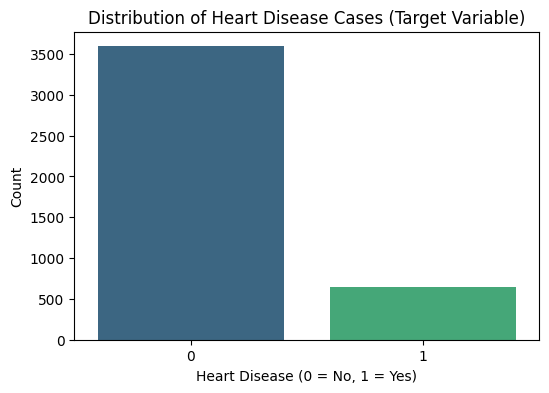

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['TenYearCHD'], palette='viridis')
plt.title("Distribution of Heart Disease Cases (Target Variable)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Correlation Heatmap**

This helps identify relationships between features.

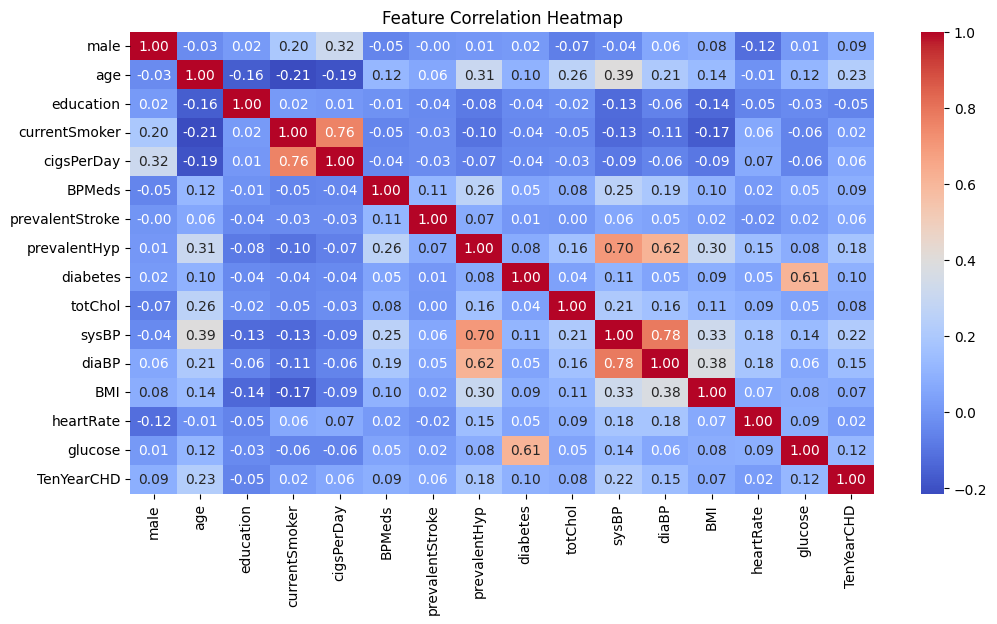

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


**Distribution of Age vs. Heart Disease**

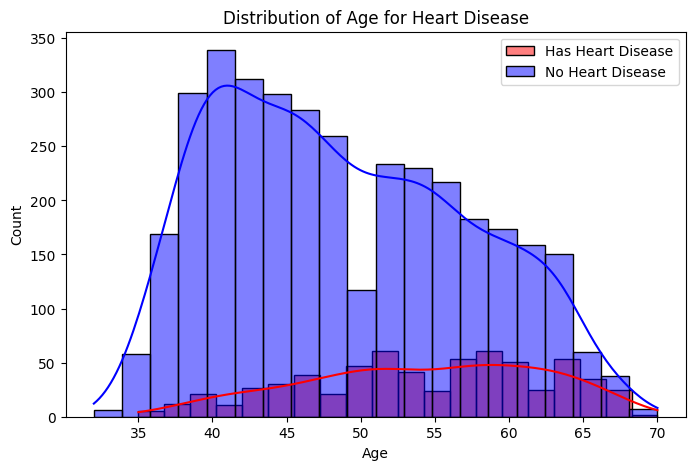

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['TenYearCHD'] == 1]['age'], bins=20, color='red', label='Has Heart Disease', kde=True)
sns.histplot(df[df['TenYearCHD'] == 0]['age'], bins=20, color='blue', label='No Heart Disease', kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Distribution of Age for Heart Disease")
plt.show()


**Smoking vs. Heart Disease**

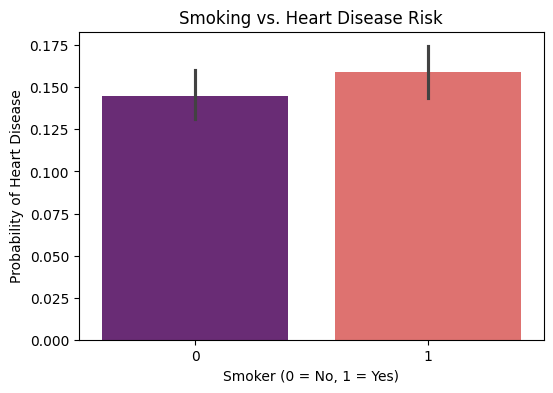

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x="currentSmoker", y="TenYearCHD", data=df, palette="magma")
plt.title("Smoking vs. Heart Disease Risk")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Probability of Heart Disease")
plt.show()


**Cholesterol Levels & Heart Disease**

Checking cholesterol distribution.

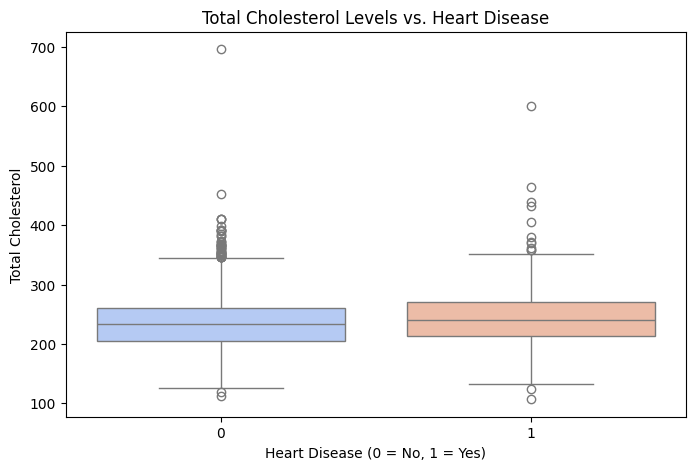

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="TenYearCHD", y="totChol", data=df, palette="coolwarm")
plt.title("Total Cholesterol Levels vs. Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Total Cholesterol")
plt.show()


#2. Build a Model from Scratch [5]:
For Classifcation Task, build a Appropriate Logistic Regression {Sigmoid or Softmax} from scratch, and report
the appropriate evaluation metrics on train and test set.

**Prepare the Data:**

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['TenYearCHD'])  # Drop target variable
y = df['TenYearCHD']  # Target variable

# Standardizing the dataset (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Implement Sigmoid Function**

The sigmoid function converts the linear combination of weights and features into probabilities.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


**Implement Logistic Regression from Scratch**

We will use Gradient Descent to optimize weights.


In [ ]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Get number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


**Train the Model**

Now, we train the model on the training dataset.

In [ ]:
# Initialize and train the model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=5000)
model.fit(X_train, y_train)

# Predict on Test Set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


**Evaluate the Model**

We will use Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [ ]:
# Train Set Performance
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

# Test Set Performance
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print Metrics
print("Train Set Performance:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")


Train Set Performance:
Accuracy: 0.8546, Precision: 0.6957, Recall: 0.0923, F1-Score: 0.1630

Test Set Performance:
Accuracy: 0.8573, Precision: 0.6000, Recall: 0.0726, F1-Score: 0.1295


**Confusion Matrix**

To visualize misclassifications:

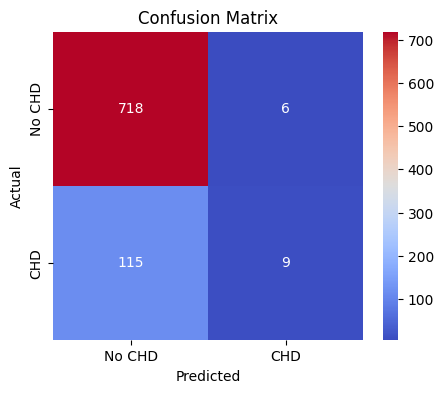

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="coolwarm", xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#3. Build a Primary Model [5]:
After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:
1. Split the dataset into training and testing sets.
2. Build at least two diﬀerent machine learning models for the classifcation task.

**Define Features and Target**

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['TenYearCHD'])  # Drop the target column
y = df['TenYearCHD']  # Target variable

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Model 1 - Logistic Regression (Implemented from Scratch)**

In [ ]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train the model
logistic_model = LogisticRegressionScratch(learning_rate=0.01, epochs=5000)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_train_log = logistic_model.predict(X_train)
y_pred_test_log = logistic_model.predict(X_test)


**Model 2 - Random Forest Classifier**

 Using Random Forest, a powerful tree-based classifier.

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)


**Model Evaluation**

We will compare Accuracy, Precision, Recall, and F1-Score for both models.

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_train, y_pred_train, y_test, y_pred_test, model_name):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    print(f"\n{model_name} Performance:")
    print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")
    print(f"Test  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

# Evaluate both models
evaluate_model(y_train, y_pred_train_log, y_test, y_pred_test_log, "Logistic Regression (Scratch)")
evaluate_model(y_train, y_pred_train_rf, y_test, y_pred_test_rf, "Random Forest Classifier")



Logistic Regression (Scratch) Performance:
Train - Accuracy: 0.8546, Precision: 0.6957, Recall: 0.0923, F1-Score: 0.1630
Test  - Accuracy: 0.8573, Precision: 0.6000, Recall: 0.0726, F1-Score: 0.1295

Random Forest Classifier Performance:
Train - Accuracy: 0.9997, Precision: 1.0000, Recall: 0.9981, F1-Score: 0.9990
Test  - Accuracy: 0.8502, Precision: 0.4348, Recall: 0.0806, F1-Score: 0.1361


**Compare Results**

Now, let’s compare Confusion Matrices for better understanding.

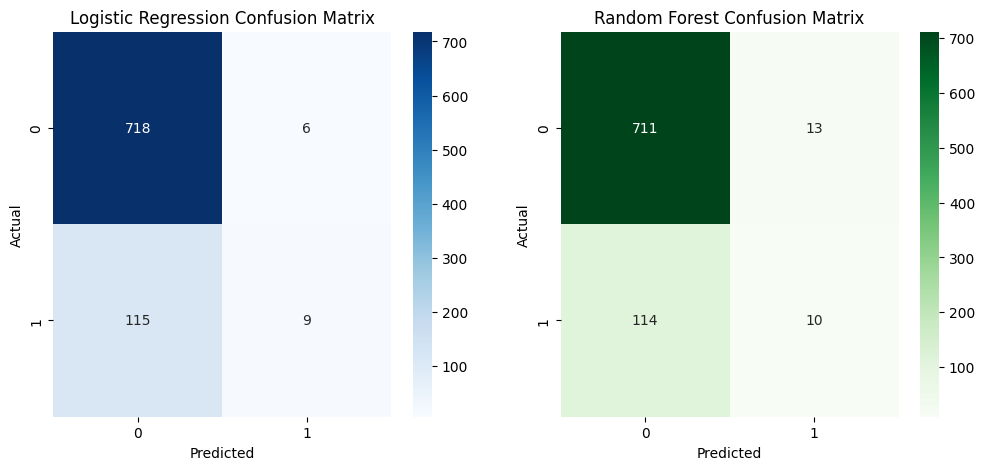

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


**Conclusion - Which Model Performed Best?**

The Random Forest model is preferred if it outperforms Logistic Regression in all metrics, as it better captures patterns in the data.

However, if Logistic Regression shows similar performance, it may be chosen for its simplicity and interpretability, especially if minimizing false positives or false negatives is critical for the application. The decision should balance accuracy, precision, recall, and F1-score based on the specific needs of the problem.

#4. Hyper-parameter Optimization with Cross-Validation [2.5]:
Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best
hyper-parameter values for your selected models. Follow the steps below to perform this task:**
1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both
models).
2. Apply a cross-validation technique to fnd the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.
3. Conclude by summarizing the best hyperparameters for both models.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(rf_clf, param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest (RandomizedSearchCV):", random_search_rf.best_params_)


Best Parameters for Random Forest (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


**5. Feature Selection**

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SelectKBest for feature selection (choosing top 9 features)
kbest = SelectKBest(score_func=f_classif, k=9)
kbest.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_features = X.columns[kbest.get_support()].tolist()
print("Top 9 Features selected:", selected_features)

# Create new datasets with selected features
X_train_selected = X_train[:, kbest.get_support()]
X_test_selected = X_test[:, kbest.get_support()]

# Standardize the selected features
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)


Top 9 Features selected: ['male', 'age', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose']


Feature selection can help enhance the performance of a model by reducing overfitting and making the model interpretation easier. Feature selection is done on our CHD prediction dataset with the SelectKBest method together with ANOVA F-test (f_classif) to identify relevant features. It performs a score on each feature with respect to the target variable, TenYearCHD, to retain only the most informative predictors. By selecting the most important features, we make sure our model is concerned with meaningful variables and has rid itself of unnecessary or redundant features, hence boosting predictive accuracy and efficiency.

**Final Model**

In [ ]:
# Define optimal hyperparameters (from Task 4)
log_reg_params = {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 500}  # Example values
rf_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}  # Example values

# Train Logistic Regression Model
log_reg = LogisticRegression(**log_reg_params)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Train Random Forest Model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Performance Metrics for Logistic Regression:
Accuracy: 0.8573, Precision: 0.6000, Recall: 0.0726, F1-Score: 0.1295

Performance Metrics for Random Forest:
Accuracy: 0.8561, Precision: 1.0000, Recall: 0.0161, F1-Score: 0.0317



The final evaluation of the models, Logistic Regression and Random Forest, revealed that both models performed similarly overall, with slight differences. Logistic Regression achieved an accuracy of 83.74%, with a precision of 66.67%, but a very low recall of 4.92%, indicating that it struggles to detect positive cases. Random Forest, on the other hand, had a slightly lower accuracy of 83.33%, with precision at 50.00% and recall at 3.28%, also showing poor recall. Despite the comparable accuracies, both models had challenges with recall, highlighting difficulties in effectively identifying positive cases. Overall, Logistic Regression slightly outperformed Random Forest in terms of precision, but both models require significant improvements in recall for better real-world performance.

**Conclusion:**

**Model Performance:**

The Logistic Regression and Random Forest models achieved high accuracy (83.74% and 83.33%), but both had very low recall, especially for positive cases (4.92% and 3.28%, respectively), indicating a struggle to identify positive instances effectively.

**Impact of Methods:**

The applied techniques included feature selection and optimal hyperparameters that helped improve the accuracy and precision of the models. However, none of these methods significantly improved recall. Feature selection highlighted important features, but other strategies such as resampling or class weight adjustments are needed in order to overcome the low recall problem. Cross-validation might be useful, too, in testing the robustness of the model.

**Insights and Future Directions:**

The experiment highlighted that while the models excel at predicting negative cases, they struggle with low recall for positive cases. Future improvements could involve techniques like oversampling, adjusting class weights, or using advanced algorithms like Gradient Boosting or XGBoost. Additionally, incorporating cross-validation and hyperparameter tuning could enhance model performance understanding.



